In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [5]:
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day'])
    df = df.astype(float)



    return df

def rf_grid_search():
    df = pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])


# Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Define the grid of hyperparameters to search
    
    param_grid = {
        'n_estimators': [100, 200, 400],
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}

    model = RandomForestClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Extract the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    test_accuracy = best_model.score(X_test, y_test)
    print("Best Model Parameters:", grid_search.best_params_)
    print("Test Set Accuracy:", test_accuracy)

def main():
    rf_grid_search()

In [6]:
main()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Model Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Test Set Accuracy: 0.8051750380517504


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def rf_model():
    df = pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])


    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = RandomForestClassifier(max_depth= 4, min_samples_split=10, n_estimators= 100, min_samples_leaf= 2)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    
    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    
    plt.show()

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate sensitivity and specificity
    sensitivity = tpr[np.argmax(tpr - fpr)]
    specificity = 1 - fpr[np.argmax(tpr - fpr)]
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

   
    #[4014:4056]
    df1=pd.read_csv('final_dataset.csv')
    df_final=df1[['Day','Holiday', 'Time_Segment', 'Season', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][4194:4236]
    df_final['Prediction']=y_pred[471:513].astype(int)

    accuracy_f = accuracy_score(y_test[471:513], y_pred[471:513])
    print("Accuracy final:", accuracy_f)

    print(df_final.to_string(index=False))
    df_final.to_csv('tabla_finalsitu2.csv', index=False)
    return df_final

def main():
    rf_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Accuracy: 0.8097412480974124
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79       326
         1.0       0.77      0.88      0.82       331

    accuracy                           0.81       657
   macro avg       0.82      0.81      0.81       657
weighted avg       0.82      0.81      0.81       657

Confusion Matrix:
[[240  86]
 [ 39 292]]


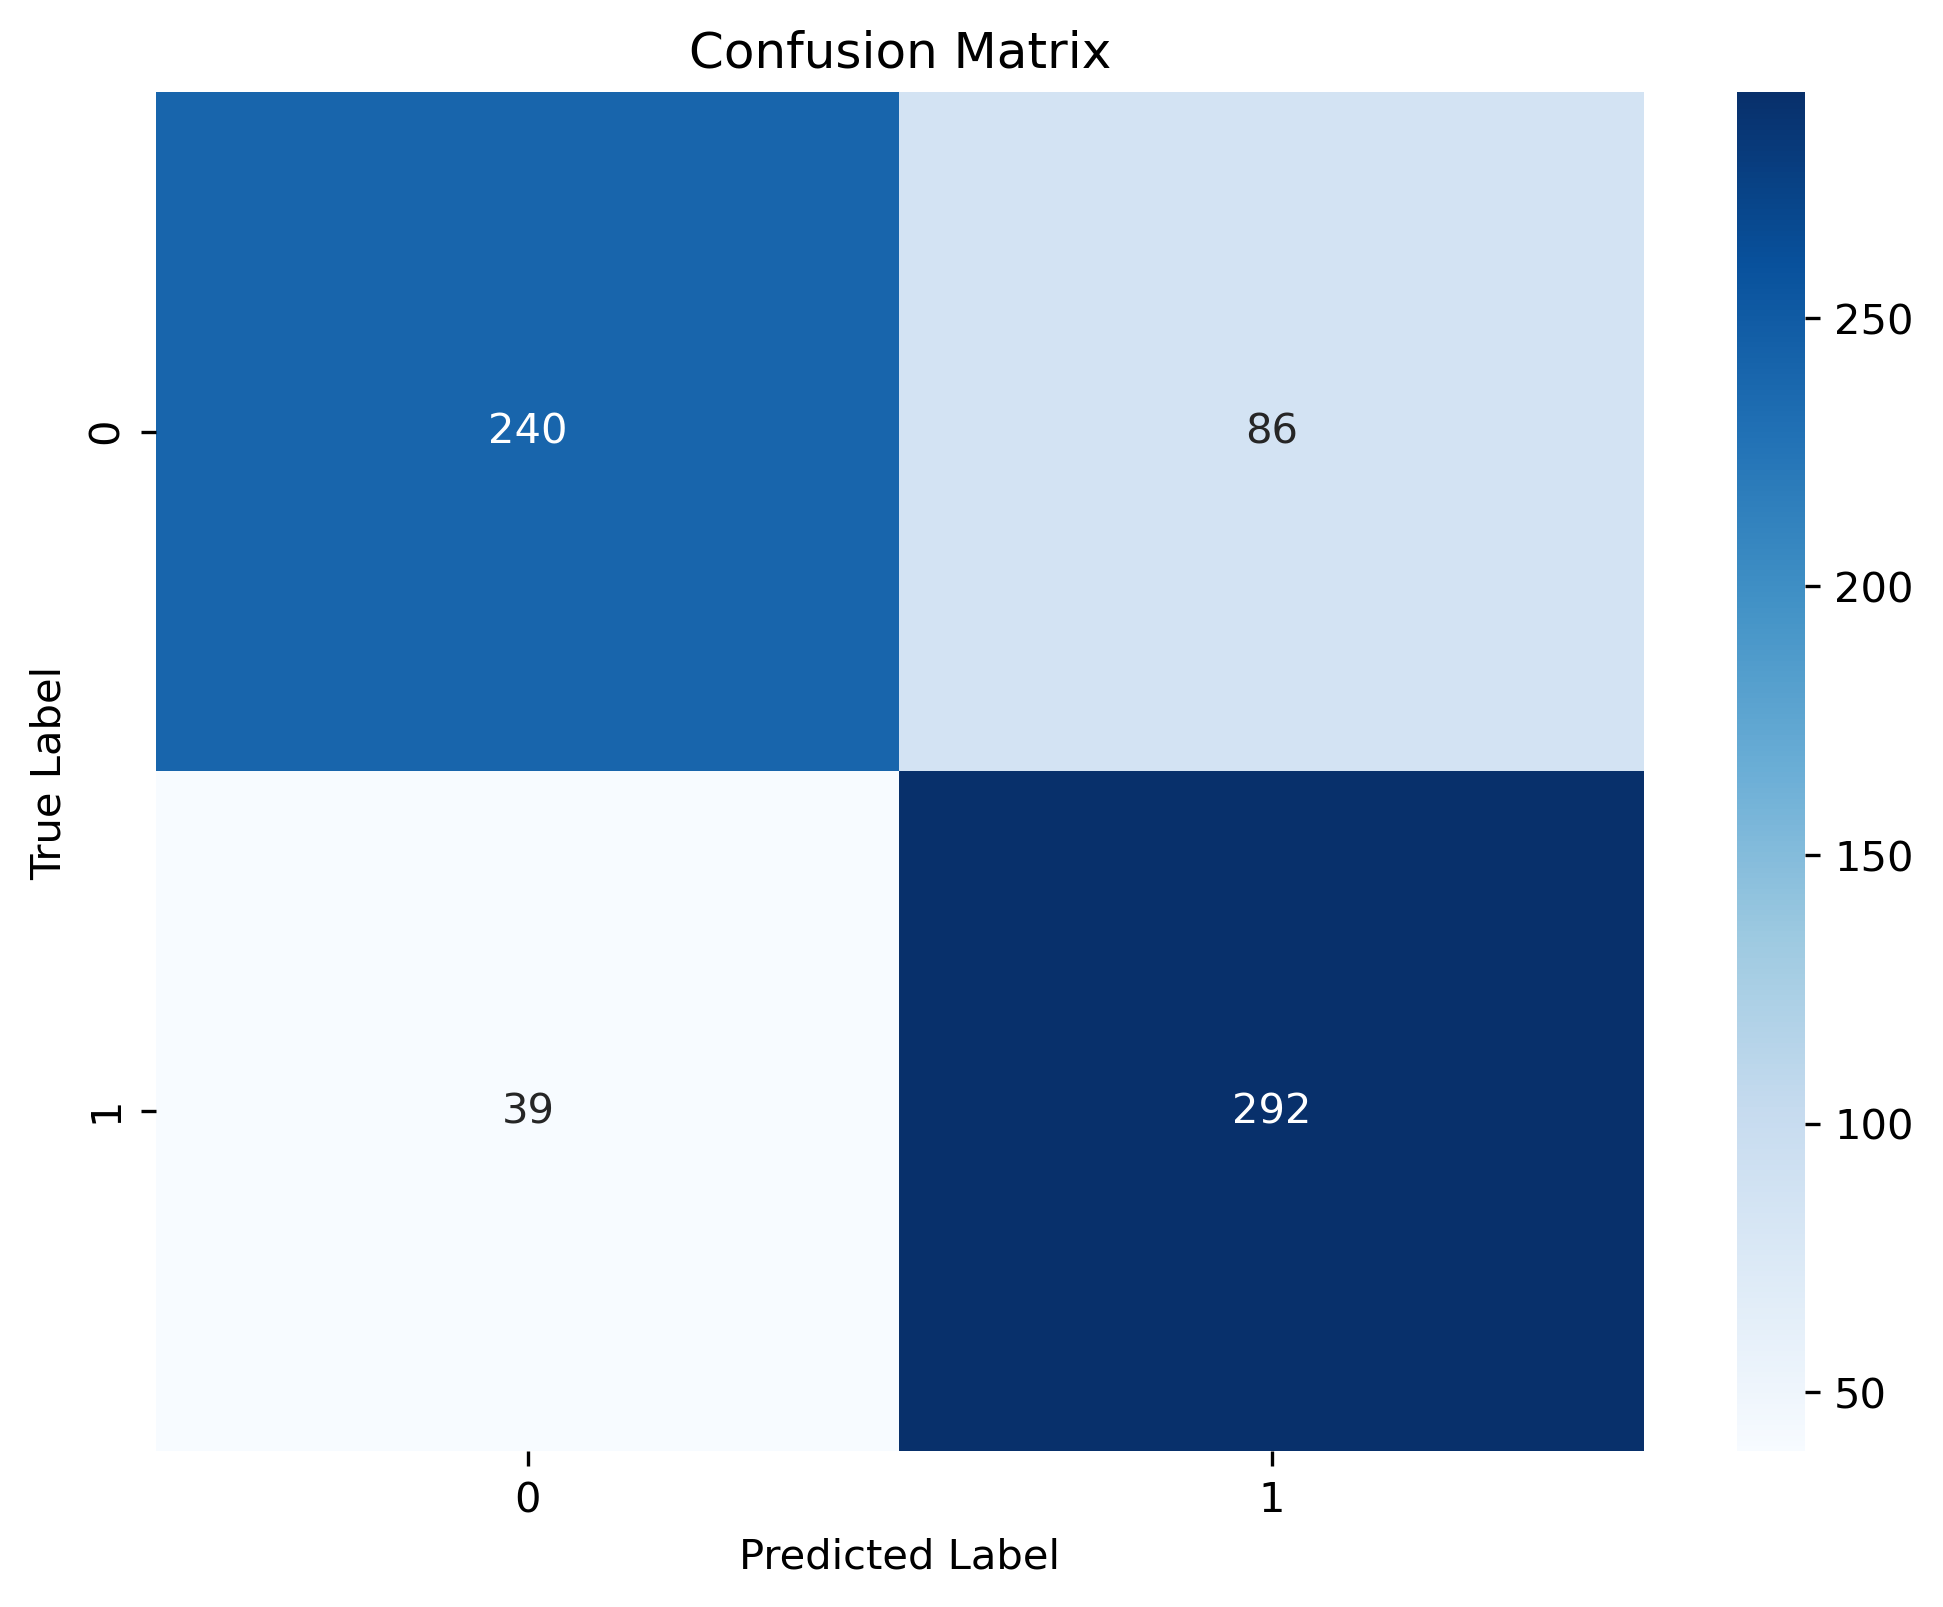

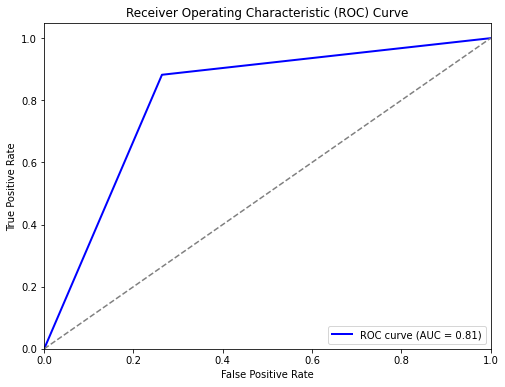

Sensitivity: 0.8821752265861027
Specificity: 0.7361963190184049
Accuracy final: 0.7857142857142857
       Day Holiday Time_Segment Season  Week_day  Vacation_week  Exceeds Threshold  Prediction
2022-12-01      No          2-6 Winter  Thursday              0                  0           0
2022-12-01      No         6-10 Winter  Thursday              0                  1           1
2022-12-01      No        10-14 Winter  Thursday              0                  1           1
2022-12-01      No        14-18 Winter  Thursday              0                  1           1
2022-12-01      No        18-22 Winter  Thursday              0                  1           1
2022-12-01      No         22-2 Winter  Thursday              0                  1           0
2022-12-02      No          2-6 Winter    Friday              0                  0           0
2022-12-02      No         6-10 Winter    Friday              0                  1           1
2022-12-02      No        10-14 Winter    Frid

In [8]:
main()

In [9]:
df=pd.read_csv('tabla_finalsitu2.csv')

In [10]:
df

,Day,Holiday,Time_Segment,Season,Week_day,Vacation_week,Exceeds Threshold,Prediction
0,2022-12-01,No,2-6,Winter,Thursday,0,0,0
1,2022-12-01,No,6-10,Winter,Thursday,0,1,1
2,2022-12-01,No,10-14,Winter,Thursday,0,1,1
3,2022-12-01,No,14-18,Winter,Thursday,0,1,1
4,2022-12-01,No,18-22,Winter,Thursday,0,1,1
5,2022-12-01,No,22-2,Winter,Thursday,0,1,0
6,2022-12-02,No,2-6,Winter,Friday,0,0,0
7,2022-12-02,No,6-10,Winter,Friday,0,1,1
8,2022-12-02,No,10-14,Winter,Friday,0,1,1
9,2022-12-02,No,14-18,Winter,Friday,0,1,1


In [12]:
# Para ver las filas 34 y 41
filas_seleccionadas = df.iloc[[22, 31, 34]]
filas_seleccionadas


,Day,Holiday,Time_Segment,Season,Week_day,Vacation_week,Exceeds Threshold,Prediction
22,2022-12-04,Yes,18-22,Winter,Sunday,0,1,0
31,2022-12-06,No,6-10,Winter,Tuesday,1,0,1
34,2022-12-06,No,18-22,Winter,Tuesday,1,0,1
